## This is project is to predict the wellhead pressure and flow pattern within the well

### Import modules

In [1]:
import itertools
import numpy as np
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np

from sklearn import preprocessing

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets, layers, models

%matplotlib inline

### Read raw data

In [2]:
df=pd.read_csv('simple_well1.csv')

In [3]:
df.head()

,Date,Gas Flow_MMSCFD,Oil_bpd,Water_bpd,FWHP_psig,FroudeNumberGas6,FroudeNumberLiquid6,HoldupFractionLiquid6,ReynoldsNumber6,SuperficialVelocityGas6,SuperficialVelocityLiquid6,SurfaceTensionLiquidInSitu6,ViscosityLiquidInSitu6,FlowPatternGasLiquid6,FINAPRESS,FINATEMP
0,1/1/2020,2.0,480.0,4500.0,5600.0,0.079350,0.829993,0.845727,409800.7890,0.510384,2.641022,0.013319,0.273293,4,2126.376735,212.370290
1,1/2/2020,2.0,480.0,3450.0,5500.0,0.079880,0.669710,0.817304,334632.3328,0.507737,2.124772,0.012765,0.275990,4,2177.457559,208.752810
2,1/3/2020,2.0,480.0,3000.0,5400.0,0.081080,0.598358,0.797930,303566.9168,0.517678,1.900507,0.012747,0.277711,4,2168.102001,206.531840
3,1/4/2020,2.0,479.0,2500.0,5300.0,0.082113,0.520704,0.774212,268085.3347,0.522150,1.652199,0.012434,0.280040,4,2183.207951,203.401306
4,1/5/2020,2.0,479.0,2000.0,5200.0,0.082792,0.444817,0.747499,231149.3853,0.519421,1.406630,0.011781,0.283581,4,2220.778037,199.208880


In [4]:
df.drop(columns='Date', inplace=True)

In [5]:
df.head()

,Gas Flow_MMSCFD,Oil_bpd,Water_bpd,FWHP_psig,FroudeNumberGas6,FroudeNumberLiquid6,HoldupFractionLiquid6,ReynoldsNumber6,SuperficialVelocityGas6,SuperficialVelocityLiquid6,SurfaceTensionLiquidInSitu6,ViscosityLiquidInSitu6,FlowPatternGasLiquid6,FINAPRESS,FINATEMP
0,2.0,480.0,4500.0,5600.0,0.079350,0.829993,0.845727,409800.7890,0.510384,2.641022,0.013319,0.273293,4,2126.376735,212.370290
1,2.0,480.0,3450.0,5500.0,0.079880,0.669710,0.817304,334632.3328,0.507737,2.124772,0.012765,0.275990,4,2177.457559,208.752810
2,2.0,480.0,3000.0,5400.0,0.081080,0.598358,0.797930,303566.9168,0.517678,1.900507,0.012747,0.277711,4,2168.102001,206.531840
3,2.0,479.0,2500.0,5300.0,0.082113,0.520704,0.774212,268085.3347,0.522150,1.652199,0.012434,0.280040,4,2183.207951,203.401306
4,2.0,479.0,2000.0,5200.0,0.082792,0.444817,0.747499,231149.3853,0.519421,1.406630,0.011781,0.283581,4,2220.778037,199.208880


In [6]:
df['FlowPatternGasLiquid6'].nunique()

2

zero hot encoding

In [7]:
df2=pd.get_dummies(df['FlowPatternGasLiquid6'],prefix='FlowPattern')

In [8]:
df2.head()

,FlowPattern_3,FlowPattern_4
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


In [9]:
df=pd.concat([df,df2],axis=1)

In [10]:
df.drop(columns='FlowPatternGasLiquid6', inplace=True)

In [11]:
df.head()

,Gas Flow_MMSCFD,Oil_bpd,Water_bpd,FWHP_psig,FroudeNumberGas6,FroudeNumberLiquid6,HoldupFractionLiquid6,ReynoldsNumber6,SuperficialVelocityGas6,SuperficialVelocityLiquid6,SurfaceTensionLiquidInSitu6,ViscosityLiquidInSitu6,FINAPRESS,FINATEMP,FlowPattern_3,FlowPattern_4
0,2.0,480.0,4500.0,5600.0,0.079350,0.829993,0.845727,409800.7890,0.510384,2.641022,0.013319,0.273293,2126.376735,212.370290,0,1
1,2.0,480.0,3450.0,5500.0,0.079880,0.669710,0.817304,334632.3328,0.507737,2.124772,0.012765,0.275990,2177.457559,208.752810,0,1
2,2.0,480.0,3000.0,5400.0,0.081080,0.598358,0.797930,303566.9168,0.517678,1.900507,0.012747,0.277711,2168.102001,206.531840,0,1
3,2.0,479.0,2500.0,5300.0,0.082113,0.520704,0.774212,268085.3347,0.522150,1.652199,0.012434,0.280040,2183.207951,203.401306,0,1
4,2.0,479.0,2000.0,5200.0,0.082792,0.444817,0.747499,231149.3853,0.519421,1.406630,0.011781,0.283581,2220.778037,199.208880,0,1


In [12]:
y_pre=df['FINAPRESS']
X_pre=df.drop(columns=['FINAPRESS','FINATEMP'], axis=1)

In [13]:
y_hol=df['HoldupFractionLiquid6']
X_hol=df.drop(columns=['HoldupFractionLiquid6','FINATEMP'], axis=1)

In [14]:
y_pat=df[['FlowPattern_3','FlowPattern_4']]
X_pat=df.drop(columns=['FlowPattern_3','FlowPattern_4','FINATEMP'], axis=1)

### Plot the data

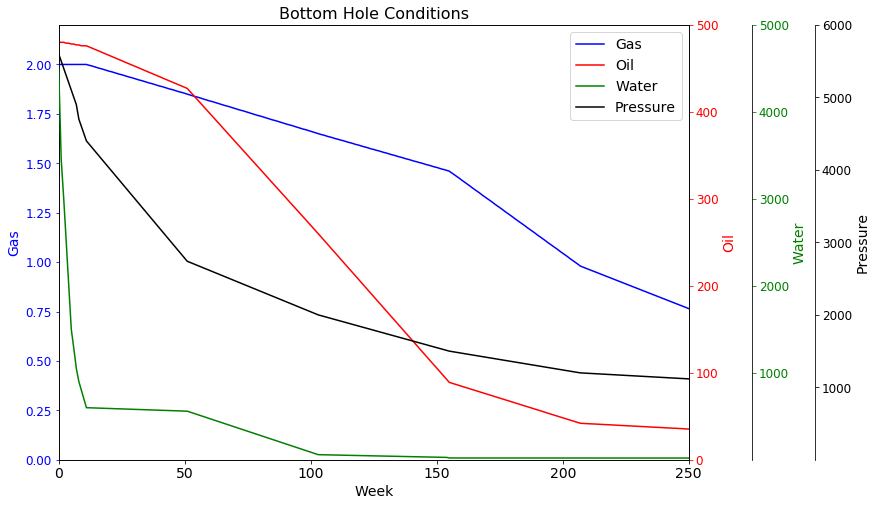

In [93]:
# Plot the input data
def make_patch_spines_invisible(ax):
    ax.set_frame_on(True)
    ax.patch.set_visible(False)
    for sp in ax.spines.values():
        sp.set_visible(False)


fig, host = plt.subplots(figsize=(10, 8))
fig.subplots_adjust(right=1)

par1 = host.twinx()
par2 = host.twinx()
par3 = host.twinx()

# Offset the right spine of par2.  The ticks and label have already been
# placed on the right by twinx above.
par2.spines["right"].set_position(("axes", 1.1))
par3.spines["right"].set_position(("axes", 1.2))
# Having been created by twinx, par2 has its frame off, so the line of its
# detached spine is invisible.  First, activate the frame but make the patch
# and spines invisible.
make_patch_spines_invisible(par2)
make_patch_spines_invisible(par3)
# Second, show the right spine.
par2.spines["right"].set_visible(True)
par3.spines["right"].set_visible(True)

p1, = host.plot(df['Gas Flow_MMSCFD'], "b-", label="Gas")
p2, = par1.plot(df['Oil_bpd'], "r-", label="Oil")
p3, = par2.plot(df['Water_bpd'], "g-", label="Water")
p4, = par3.plot(df['FWHP_psig'], "black", label="Pressure")

host.set_xlim(0, 250)
host.set_ylim(0, 2.2)
par1.set_ylim(0, 500)
par2.set_ylim(1, 5000)
par3.set_ylim(1, 6000)

host.set_xlabel("Week", fontsize=14)
host.set_ylabel("Gas", fontsize=14)
par1.set_ylabel("Oil", fontsize=14)
par2.set_ylabel("Water", fontsize=14)
par3.set_ylabel("Pressure", fontsize=14)

host.yaxis.label.set_color(p1.get_color())
par1.yaxis.label.set_color(p2.get_color())
par2.yaxis.label.set_color(p3.get_color())
par3.yaxis.label.set_color(p4.get_color())

tkw = dict(size=4, width=1.5)
host.tick_params(axis='y', colors=p1.get_color(), labelsize=12)
par1.tick_params(axis='y', colors=p2.get_color(), labelsize=12)
par2.tick_params(axis='y', colors=p3.get_color(), labelsize=12)
par3.tick_params(axis='y', colors=p4.get_color(), labelsize=12)
host.tick_params(axis='x', labelsize=14)

lines = [p1, p2, p3, p4]

host.legend(lines, [l.get_label() for l in lines], fontsize=14)
plt.title("Bottom Hole Conditions", fontsize=16)

plt.show()